### THỰC HÀNH 3: HỌC GIÁM SÁT - MÔ HÌNH PHÂN LỚP VỚI K-NEAREST NEIGHBOURS
------------------------
#### *3. CÀI ĐẶT GIẢI THUẬT K-NN*
##### *3.1. Nạp thư viện*


In [16]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

---------------------
##### *3.2. Nạp dữ liệu*

In [17]:
#importing datasets
data_set = pd.read_csv("User_Data.csv")
print(data_set.head())

#Extracting independent and dependent variables
x = data_set.iloc[:, [2, 3]].values
y = data_set.iloc[:, 4].values

# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train.shape)
print(y_train.shape)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
(300, 2)
(300,)


-------
##### *3.3. Feature Scaling*

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

------
##### *3.4. Huấn luyện phân lớp K-NN*

In [19]:
#Fitting K-NN classifier to the training set
# n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
# metric='minkowski': This is the default parameter and it decides the distance between and points.
# p=2: It is equivalent to the standard Euclidean metric.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


----
##### *3.5. Dự báo data mới với K-NN*

In [20]:
#Pedicting the test set results
y_pred = classifier.predict(x_test)

---
##### *3.6. Tạo Confusion matrix*

In [21]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

---
##### *3.7. Trực quan hóa K-NN trên bộ train*

C:\Users\Thanh\AppData\Local\Temp\ipykernel_13220\1020101309.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


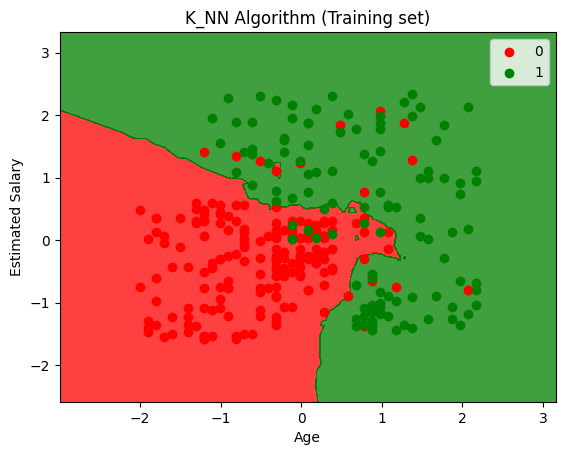

In [22]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K_NN Algorithm (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

---
##### *3.8. Trực quan hóa K-NN trên bộ test*

C:\Users\Thanh\AppData\Local\Temp\ipykernel_13220\1042954568.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(


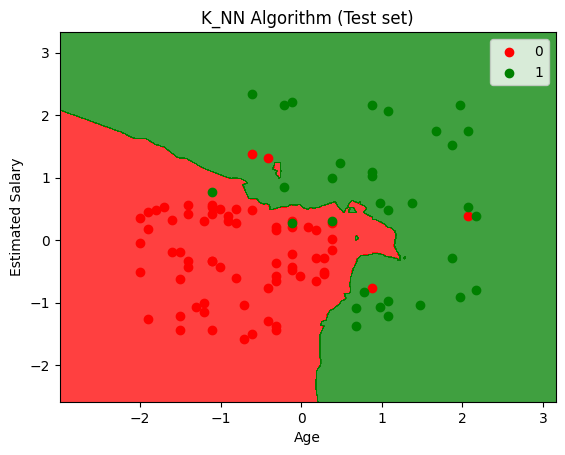

In [24]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
mtp.title('K_NN Algorithm (Test set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()

---
#### BÀI TẬP K-NN
##### Câu 1: Cho bảng dữ liệu sau:
| Height | Weight | Age | Class      |
|--------|--------|-----|------------|
| 1.70   | 65     | 20  | Programmer |
| 1.90   | 85     | 33  | Builder    |
| 1.78   | 76     | 31  | Builder    |
| 1.73   | 74     | 24  | Programmer |
| 1.81   | 75     | 35  | Builder    |
| 1.73   | 70     | 75  | Scientist  |
| 1.80   | 71     | 63  | Scientist  |
| 1.75   | 69     | 25  | Programmer |
---
a. Tạo file 'data.txt' có nội dung như bản trên

b. Viết hàm đọc nội dung từ 'data.txt'

c. Cài đặt giải thuật K-NN cho bộ dữ liệu 'data.txt'



In [ ]:
# Câu a: đã có dữ liệu data.txt rồi.
# Câu b:
import numpy as np

def read_data(file_path):
    x = []
    y = []
    with open(file_path, 'r') as f:
        next(f)
        for line in f:
            values = line.strip().replace(',', '').split()
            x.append([float(values[0]), float(values[1]), float(values[2])])
            y.append(values[3])
    return np.array(x), np.array(y)

x, y = read_data('data.txt')
print("x:\n", x)
print("y:\n", y)


X:
 [[ 1.7  65.   20.  ]
 [ 1.9  85.   33.  ]
 [ 1.78 76.   31.  ]
 [ 1.73 74.   24.  ]
 [ 1.81 75.   35.  ]
 [ 1.73 70.   75.  ]
 [ 1.8  71.   63.  ]
 [ 1.75 69.   25.  ]]
y:
 ['Programmer' 'Builder' 'Builder' 'Programmer' 'Builder' 'Scientist'
 'Scientist' 'Programmer']


In [ ]:
# Câu c:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print("Kết quả dự đoán:", y_pred)
print("Giá trị thật:", y_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Kết quả dự đoán: ['Builder' 'Programmer']
Giá trị thật: ['Scientist' 'Builder']
Confusion matrix:
[[0 1 0]
 [0 0 0]
 [1 0 0]]


##### Câu 2: Cài đặt giải thuật phân lớp giống hoa theo biến “Class” trong bộ dữ liệu “iris_data.txt” do giảng viên cung cấp.

    SL   SW   PL   PW        Class
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Báo cáo phân loại:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      m

C:\Users\Thanh\AppData\Local\Temp\ipykernel_13220\660957928.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
C:\Users\Thanh\AppData\Local\Temp\ipykernel_13220\660957928.py:57: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
C:\Users\Thanh\AppData\Local\Temp\ipykernel_13220\660957928.py:57: UserWarning: *c* argume

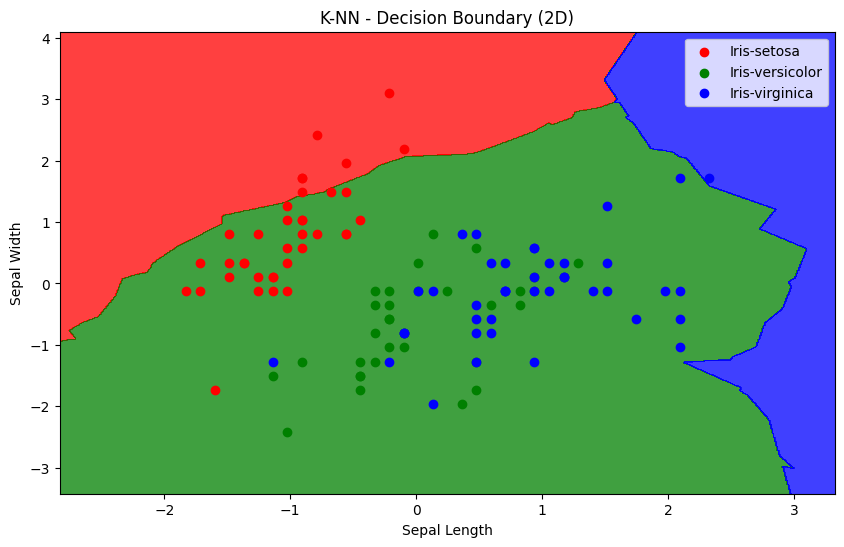

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

df = pd.read_csv('iris_data.txt')
print(df.head())
print(df.info())

x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

x_set, y_set = x_train[:, [0, 1]], y_train
x1, x2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

Z = classifier.predict(np.array([
    x1.ravel(),
    x2.ravel(),
    np.zeros_like(x1.ravel()),
    np.zeros_like(x1.ravel())
]).T)
Z = Z.reshape(x1.shape)

plt.figure(figsize=(10,6))
plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i),
                label=encoder.inverse_transform([j])[0])

plt.title('K-NN - Decision Boundary (2D)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()